# Visualization of Earnings Based On College Majors
In this project, the pandas plotting functionality was used along with the Jupyter notebook interface to allow for the quick data quickly using visualizations. A dataset on the job outcomes of students who graduated from college was used. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

## Introduction

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:
- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Using visualizations, several questions can be answered:
- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

First, libraries were imported, and rows with null values were removed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('grads-dataset.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads = recent_grads.dropna()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

## Scatter Plots

Scatter plots were generated to explore the following relations:
- `Sample_size` and `Median`
- `Sample_size` and `Unemployment_rate`
- `Full_time` and `Median`
- `ShareWomen` and `Unemployment_rate`
- `Men` and `Median`
- `Women` and `Median`

<AxesSubplot:xlabel='Sample_size', ylabel='Median'>

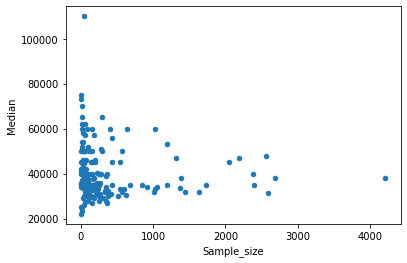

In [3]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>

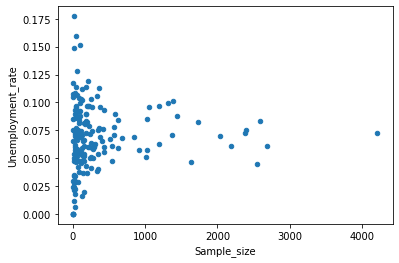

In [4]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

<AxesSubplot:xlabel='Full_time', ylabel='Median'>

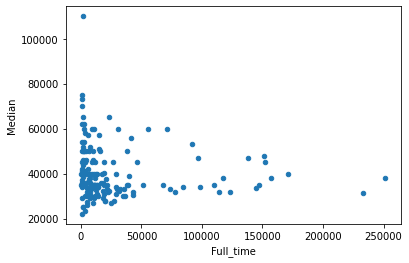

In [5]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

<AxesSubplot:xlabel='ShareWomen', ylabel='Unemployment_rate'>

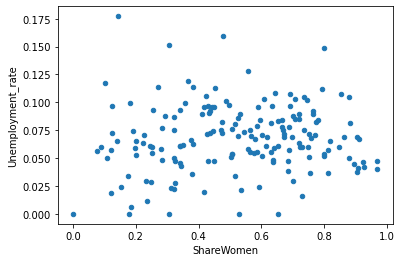

In [6]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

<AxesSubplot:xlabel='Men', ylabel='Median'>

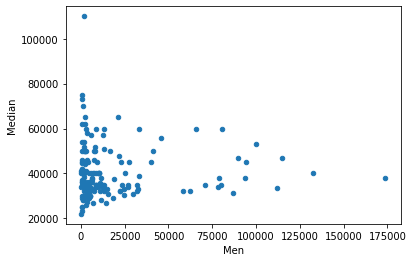

In [7]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

<AxesSubplot:xlabel='Women', ylabel='Median'>

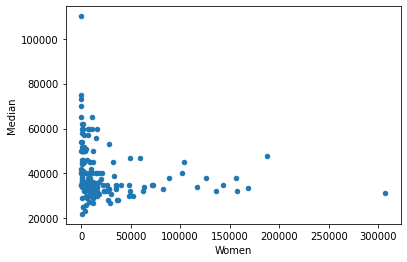

In [8]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

### Findings
- Students in more popular majors do not necessarily make more money.
- Students that majored in subjects that were majority female do not make more money.

## Histograms
Histograms were generated to explore the distributions of the following columns:
- `Sample_size`
- `Median`
- `Employed`
- `Full_time`
- `ShareWomen`
- `Unemployment_rate`
- `Men`
- `Women`

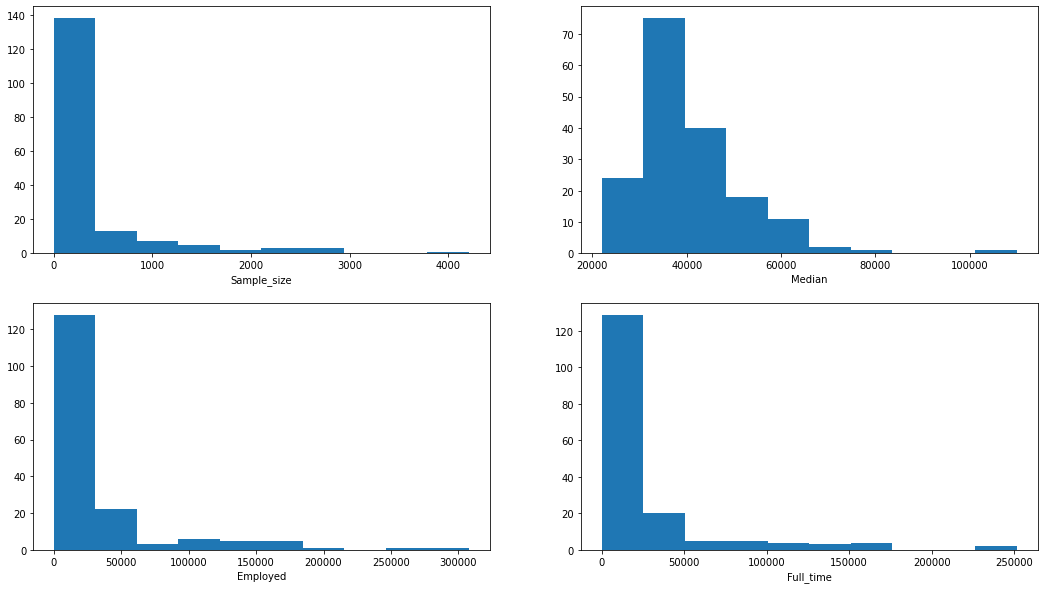

In [9]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(0,4):
    ax = fig.add_subplot(2,2,r+1)
    ax.hist(recent_grads[cols[r]])
    ax.set_xlabel(cols[r])

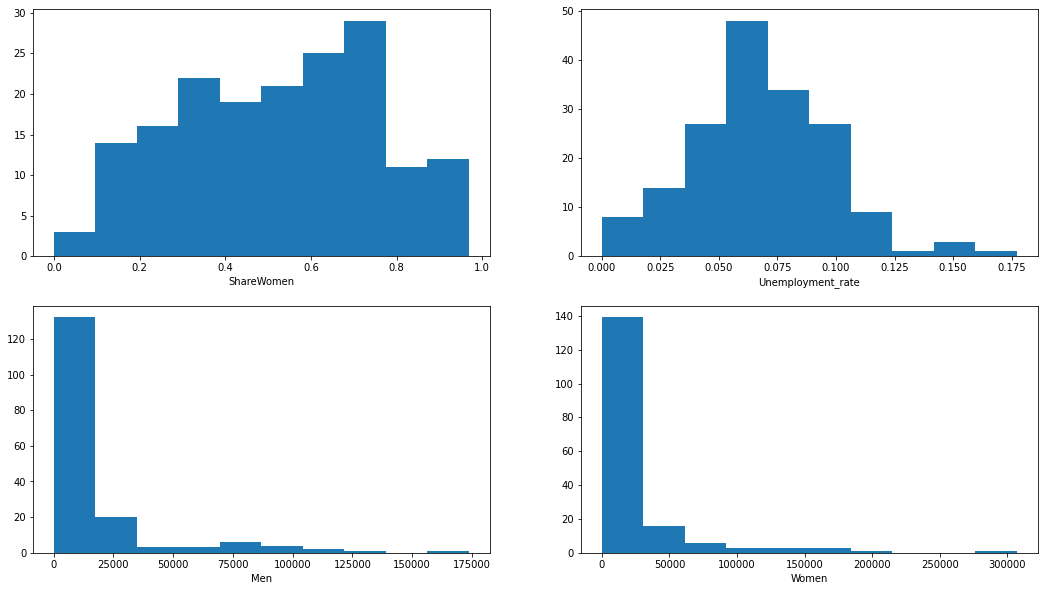

In [10]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(18,10))
for r in range(4,8):
    ax = fig.add_subplot(2,2,r-3)
    ax.hist(recent_grads[cols[r]])
    ax.set_xlabel(cols[r])

### Findings
- Around 20 percent of majors are predominantly male.
- Around 20 percent of majors are predominantly female.
- The most commen median salary range is bettween 30000 to 40000.

## Scatter Matrix Plot
Scatter plots and histograms were combined into scatter matrix plots to reveal the further relations.

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

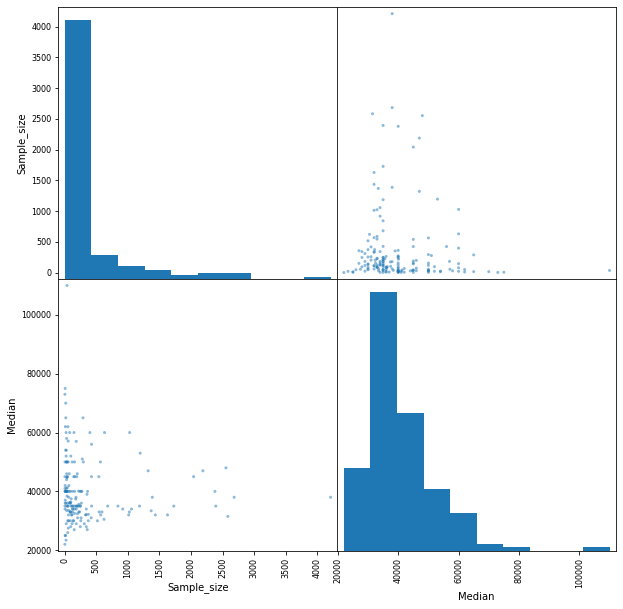

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']],
              figsize=(10,10))

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

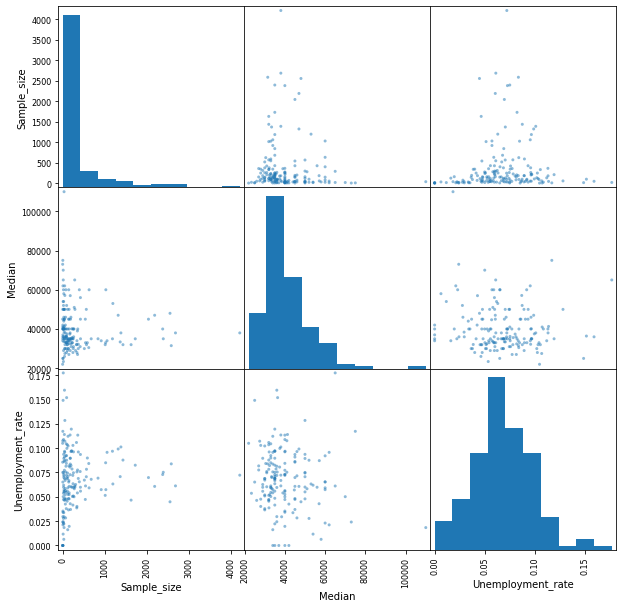

In [12]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']],
              figsize=(10,10))

## Bar Plots
Bar plots were used to compared the percentages of `Sharewomen` from the 10 highest paying majors and from the 10 lowest paying majors.

<AxesSubplot:title={'center':'10 lowest paying majors'}, xlabel='Major'>

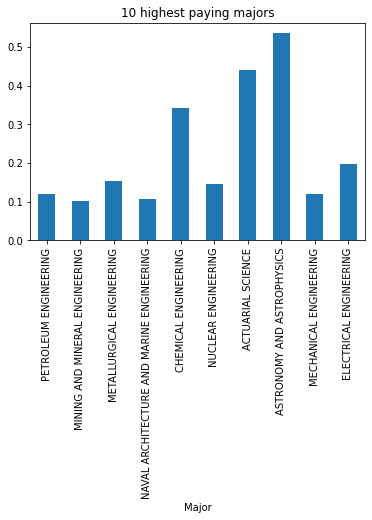

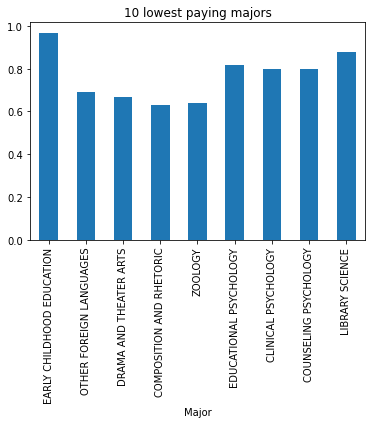

In [13]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False, title = '10 highest paying majors')
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False, title = '10 lowest paying majors')

## Box Plots
Box plots were used to explore the distributions of median salaries and unemployment rate.

<AxesSubplot:>

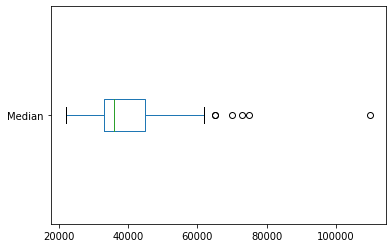

In [14]:
recent_grads['Median'].plot.box(vert=False)

<AxesSubplot:>

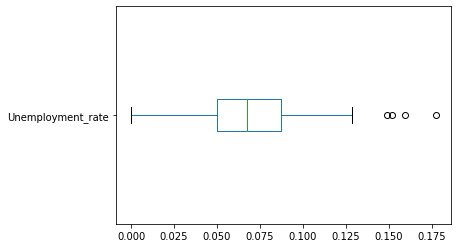

In [15]:
recent_grads['Unemployment_rate'].plot.box(vert=False)

### Findings
- Majority of Recent Graduated Students are making around 35000 to 50000.
- The range of Umemployment rate for Recent Graduated Students is bettween 0 to 12 percent.
- The median Unemployment rate is 7 percent.
- The bottom 25 percent and top 25 percent are bettween 0 to 4 percent and 8 percent to 13 percent respectively.
- Majority of Unemployment are bettween 5 percent to 10 percent.

## Hexagonal Bin Plots
Hexagonal bin plots were used to determine the unemployment rates.

<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>

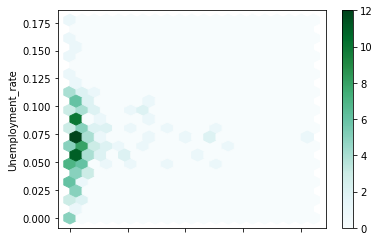

In [16]:
recent_grads.plot.hexbin(x='Sample_size', y='Unemployment_rate', gridsize=20)

### Findings
- The unemployment rates are around 5% to 10%.